In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statistics import mean
from scipy.stats import probplot
from statsmodels.stats.stattools import durbin_watson

In [2]:
dataset=pd.read_csv('C:\\Shubh\Study MAterial\\ml\\datasets\\kc_house_data_2.csv')
dataset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,condition^2,grade^2,sqft_above^2,sqft_basement^2,yr_built^2,yr_renovated^2,lat^2,long^2,sqft_living15^2,sqft_lot15^2
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,9,49,1392400,0,3822025,0,2257.314125,14946.77405,1795600,31922500.0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,9,49,4708900,160000,3806401,3964081,2277.293841,14961.93776,2856100,58354321.0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,9,36,592900,0,3736489,0,2278.907096,14940.90629,7398400,64995844.0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,25,49,1102500,828100,3861225,0,2258.226433,14980.04645,1849600,25000000.0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,9,64,2822400,0,3948169,0,2267.359642,14894.98203,3240000,56295009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,...,9,64,2340900,0,4036081,0,2275.223220,14968.54372,2340900,2277081.0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,...,9,64,5336100,0,4056196,0,2257.266614,14972.45904,3348900,51840000.0
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,...,9,49,1040400,0,4036081,0,2265.226911,14957.04540,1040400,4028049.0
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,...,9,64,2560000,0,4016016,0,2259.528690,14900.84076,1988100,1656369.0


In [3]:
target=dataset['price']
features=dataset.drop(['price'],axis=1)
features

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,condition^2,grade^2,sqft_above^2,sqft_basement^2,yr_built^2,yr_renovated^2,lat^2,long^2,sqft_living15^2,sqft_lot15^2
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,9,49,1392400,0,3822025,0,2257.314125,14946.77405,1795600,31922500.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,9,49,4708900,160000,3806401,3964081,2277.293841,14961.93776,2856100,58354321.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,9,36,592900,0,3736489,0,2278.907096,14940.90629,7398400,64995844.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,25,49,1102500,828100,3861225,0,2258.226433,14980.04645,1849600,25000000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,9,64,2822400,0,3948169,0,2267.359642,14894.98203,3240000,56295009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,...,9,64,2340900,0,4036081,0,2275.223220,14968.54372,2340900,2277081.0
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,...,9,64,5336100,0,4056196,0,2257.266614,14972.45904,3348900,51840000.0
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,...,9,49,1040400,0,4036081,0,2265.226911,14957.04540,1040400,4028049.0
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,...,9,64,2560000,0,4016016,0,2259.528690,14900.84076,1988100,1656369.0


In [4]:
features.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'bedrooms^2', 'bathrooms^2',
       'sqft_living^2', 'sqft_lot^2', 'floors^2', 'waterfront^2', 'view^2',
       'condition^2', 'grade^2', 'sqft_above^2', 'sqft_basement^2',
       'yr_built^2', 'yr_renovated^2', 'lat^2', 'long^2', 'sqft_living15^2',
       'sqft_lot15^2'],
      dtype='object')

In [5]:
#removing squared terms.
dataset.isnull().any()

price              False
bedrooms           False
bathrooms          False
sqft_living        False
sqft_lot           False
floors             False
waterfront         False
view               False
condition          False
grade              False
sqft_above         False
sqft_basement      False
yr_built           False
yr_renovated       False
lat                False
long               False
sqft_living15      False
sqft_lot15         False
bedrooms^2         False
bathrooms^2        False
sqft_living^2      False
sqft_lot^2         False
floors^2           False
waterfront^2       False
view^2             False
condition^2        False
grade^2            False
sqft_above^2       False
sqft_basement^2    False
yr_built^2         False
yr_renovated^2     False
lat^2              False
long^2             False
sqft_living15^2    False
sqft_lot15^2       False
dtype: bool

In [6]:
#bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15
corr=features.corr()
corrfull=dataset.corr()
corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,condition^2,grade^2,sqft_above^2,sqft_basement^2,yr_built^2,yr_renovated^2,lat^2,long^2,sqft_living15^2,sqft_lot15^2
bedrooms,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,...,0.026015,0.344695,0.409433,0.296472,0.154100,0.019125,-0.008962,-0.129599,0.360731,0.000306
bathrooms,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,...,-0.124802,0.656125,0.627447,0.302856,0.507545,0.051209,0.024499,-0.223129,0.541624,0.051976
sqft_living,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,...,-0.060562,0.772359,0.845014,0.493075,0.318883,0.055624,0.052431,-0.240325,0.744612,0.088533
sqft_lot,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,...,-0.008266,0.122506,0.192651,0.048170,0.052597,0.007541,-0.085560,-0.229456,0.136714,0.538696
floors,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,...,-0.261495,0.445104,0.446183,-0.164196,0.493003,0.006414,0.049519,-0.125400,0.268888,0.015363
waterfront,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,...,0.017484,0.091009,0.079084,0.114096,-0.026262,0.092469,-0.014320,0.041932,0.088319,0.000891
view,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,...,0.045995,0.262426,0.167940,0.295104,-0.053617,0.103764,0.006070,0.078459,0.281640,0.039791
condition,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,...,0.994541,-0.143978,-0.144664,0.134279,-0.362726,-0.061089,-0.014925,0.106469,-0.091645,-0.013457
grade,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,...,-0.149496,0.993253,0.705545,0.222219,0.448087,0.014814,0.113972,-0.198464,0.702754,0.053626
sqft_above,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,...,-0.160216,0.767196,0.953671,0.071770,0.425377,0.023386,-0.000862,-0.343909,0.724917,0.093451


In [7]:
l=[]
repeat=[]
for i in corr:
    for j in corr:
        if(abs(corr[i][j])>=0.8 and corr[i][j]!=1):
            if([i,j] not in repeat and [j,i] not in repeat):
                l.append([i,j,corr[i][j],corrfull[i]['price'],corrfull[j]['price']])
                repeat.append([i,j])
for i in l:
    print(i)

['bedrooms', 'bedrooms^2', 0.802094790961752, 0.30833836868809306, 0.21098338532198524]
['bathrooms', 'bathrooms^2', 0.9605816652284045, 0.5251340727456115, 0.5730983775436869]
['sqft_living', 'sqft_above', 0.8765965986813212, 0.7020437212325262, 0.605565506725443]
['sqft_living', 'sqft_living^2', 0.9361849758898726, 0.7020437212325262, 0.7274378488461105]
['sqft_living', 'sqft_above^2', 0.8450136217378633, 0.7020437212325262, 0.6330538971217539]
['floors', 'floors^2', 0.9853229495938879, 0.2567857049754958, 0.23668551456593953]
['view', 'view^2', 0.9601430788487119, 0.3973464743789199, 0.3990522431227168]
['condition', 'condition^2', 0.9945406812793768, 0.03639192141022467, 0.03731705282663106]
['grade', 'grade^2', 0.9932527265498037, 0.6674627402178701, 0.6924430684778607]
['sqft_above', 'sqft_living^2', 0.8190032588466791, 0.605565506725443, 0.7274378488461105]
['sqft_above', 'sqft_above^2', 0.9536706279322756, 0.605565506725443, 0.6330538971217539]
['sqft_basement', 'sqft_basement^

In [8]:
#dropping multicollinearity
features=features.drop(['bedrooms^2','bathrooms','sqft_above','sqft_living','floors^2','condition','grade','sqft_basement','yr_built','yr_renovated','lat','sqft_living15','sqft_above^2'],axis=1)

In [9]:
len(features.columns),len(dataset.columns)

(21, 35)

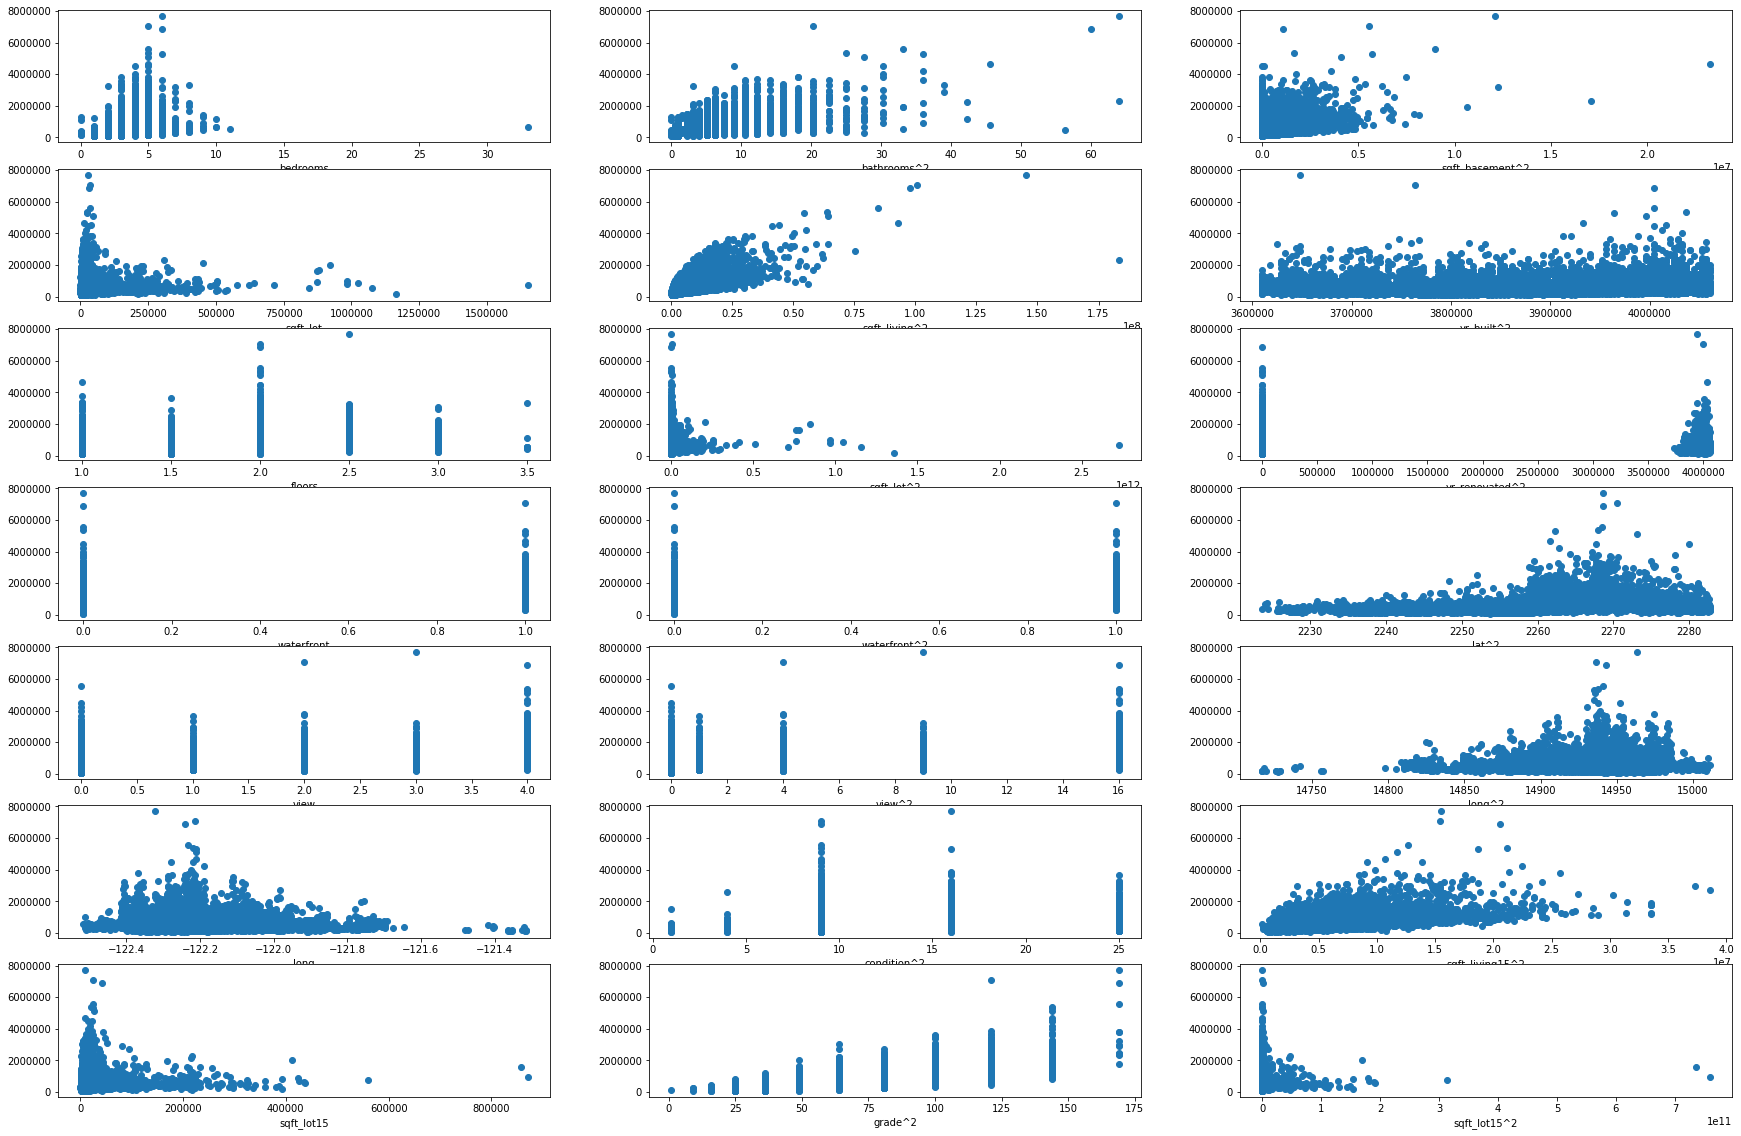

In [10]:
fig,ax=plt.subplots(7,3,figsize=(30,20))
i,j=0,0
for k in features.columns:
    ax[i][j].scatter(dataset[k],target)
    ax[i][j].set_xlabel(k)
    i+=1
    if(i==7):
        i=0
        j+=1

In [11]:
xscaler=MinMaxScaler()
X=xscaler.fit_transform(np.array(features))
yscaler=MinMaxScaler()
Y=yscaler.fit_transform(np.array(target).reshape(-1,1))
#X=features
#Y=target

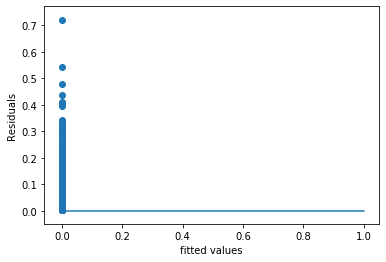

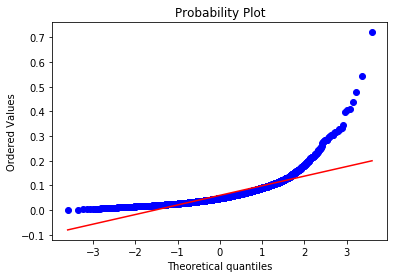

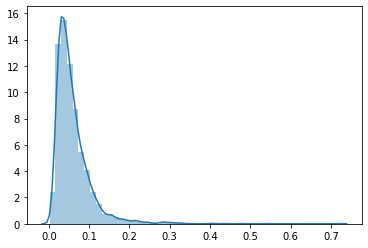

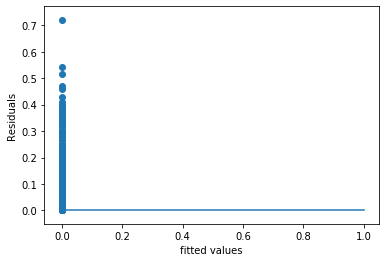

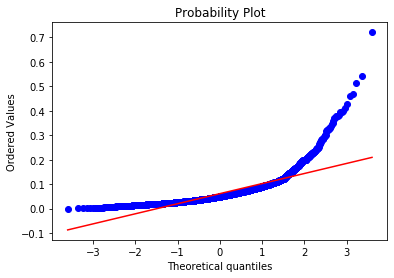

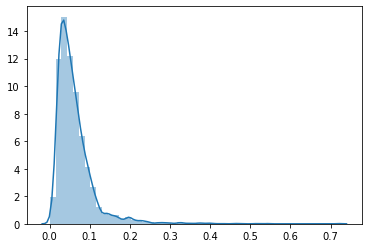

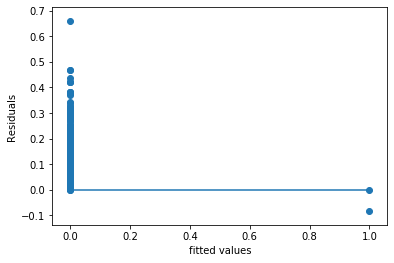

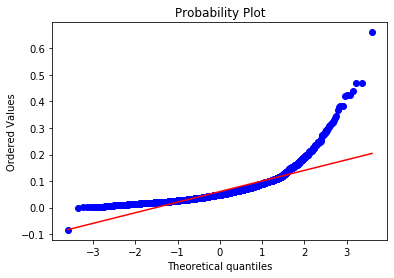

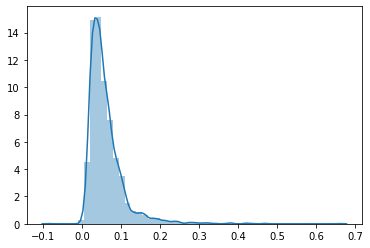

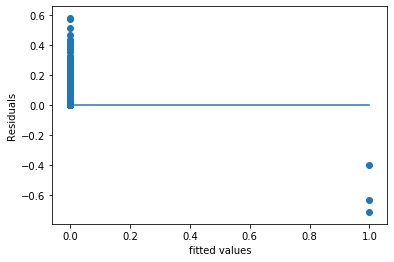

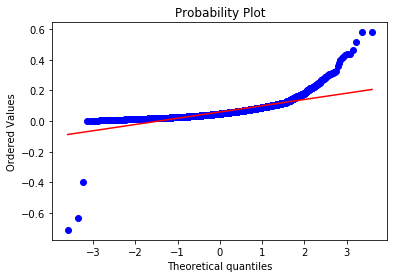

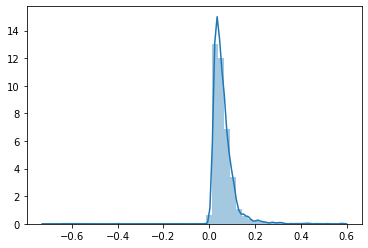

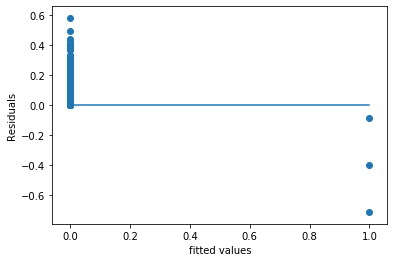

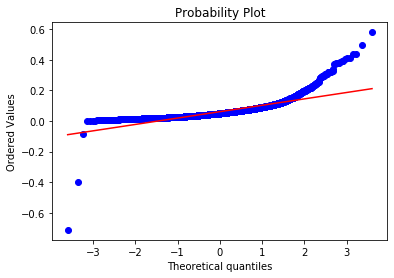

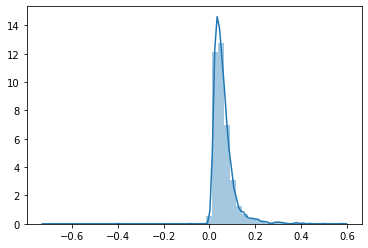

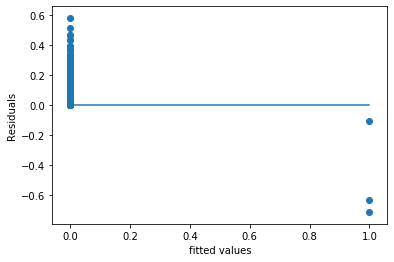

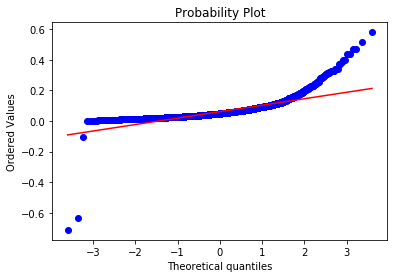

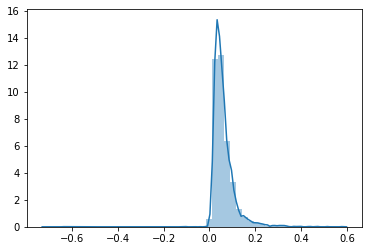

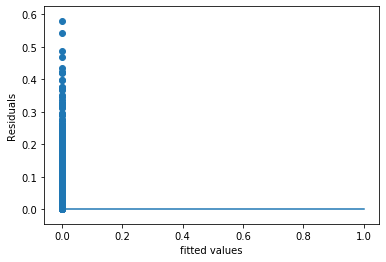

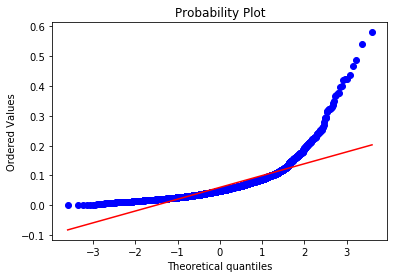

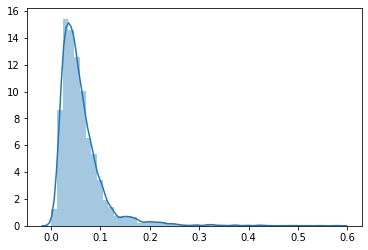

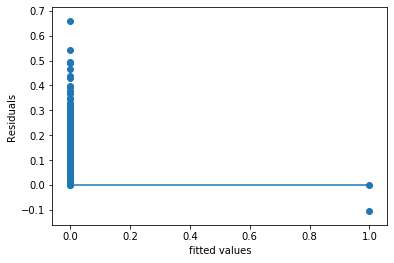

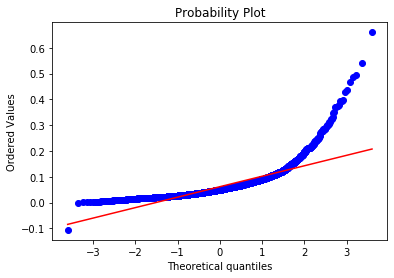

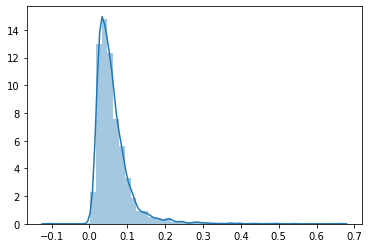

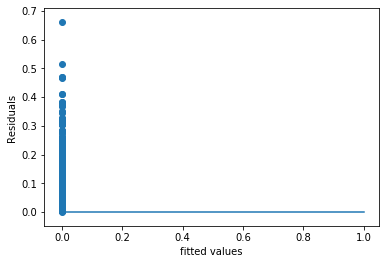

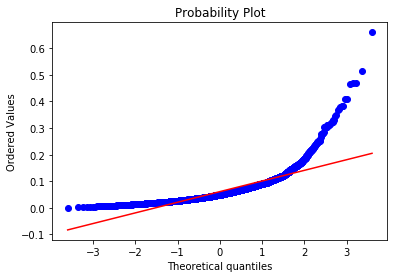

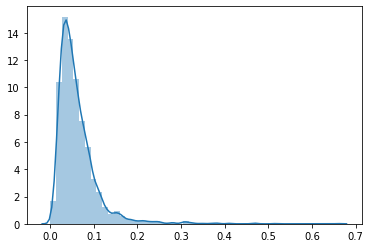

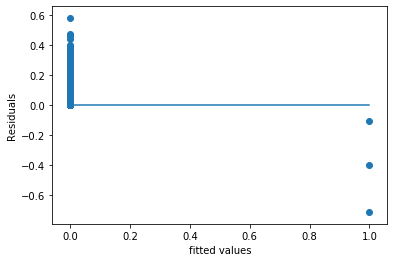

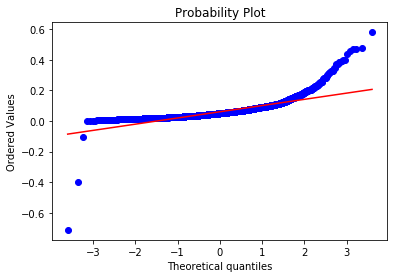

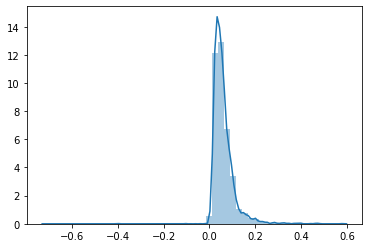

0.7689243368633689


(0.005942628781337663,
 0.0006167405050708406,
 -1.5543146258648484,
 0.06052685106805762)

In [12]:
prederr=[]
predr2=[]
meanloss=[]
trainerr=[]
durb=[]
for i in range(10):
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i*5)
    model=LinearRegression()
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    ypred= np.round_(ypred)
    ypre=model.predict(xtrain)
    
    trainerr.append(mean_squared_error(ytrain,ypre))
    prederr.append(mean_squared_error(ytest,ypred))
    predr2.append(r2_score(ytest,ypred))
    
    loss=ytest-ypred
    meanloss.append(np.mean(loss))
    #testing for linearity and homoscedasticity
    plt.scatter(ypred,loss)
    plt.plot([0,1],[0,0])
    plt.xlabel('fitted values')
    plt.ylabel('Residuals')
    plt.show()
    #result=pass
    
    #testing normality of residual 
    probplot(loss.flatten(),fit=True,plot=plt)
    plt.show()
    sns.distplot(loss)
    plt.show()
    #result=pass
    
    #testing autocorrelation of residuals
    durb.append(durbin_watson(loss.flatten()))
    
    
print(mean(durb))
meanerr=mean(prederr)
meanee=mean(trainerr)
meanr2=mean(predr2)

meanerr,meanee,meanr2,mean(meanloss)

executing 0


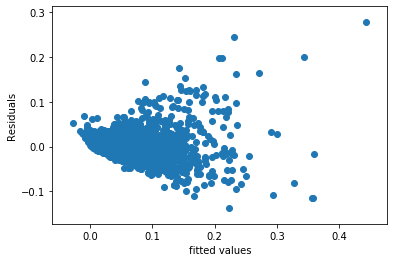

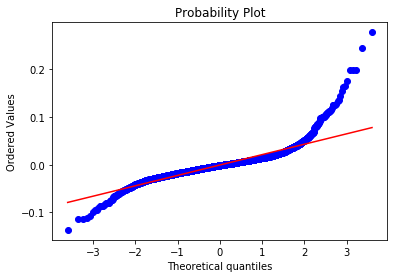

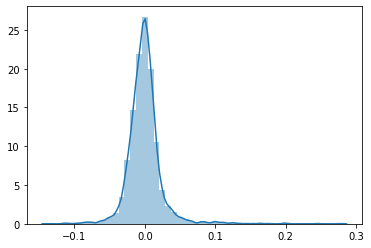

executing 1


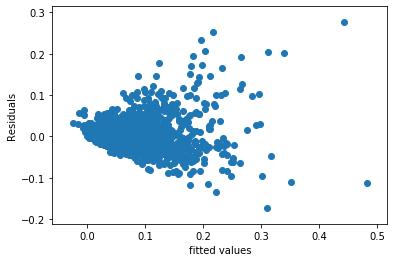

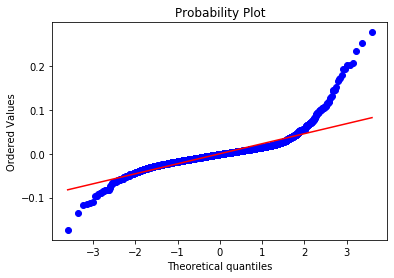

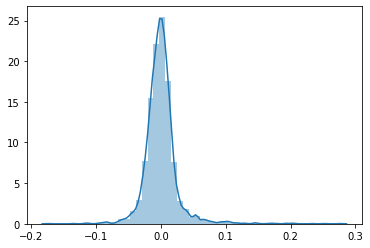

executing 2


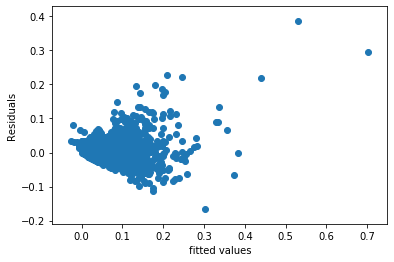

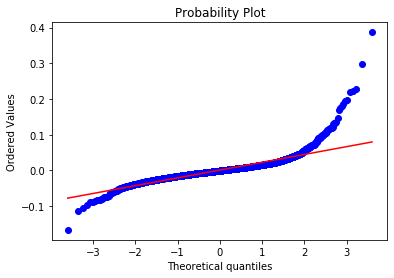

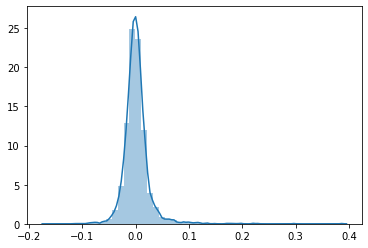

executing 3


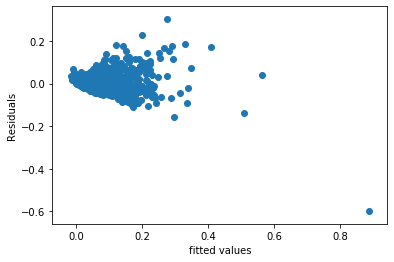

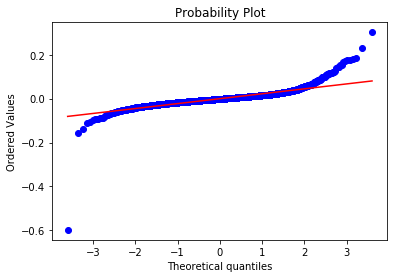

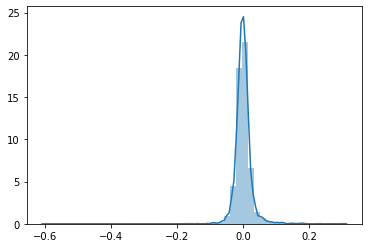

executing 4


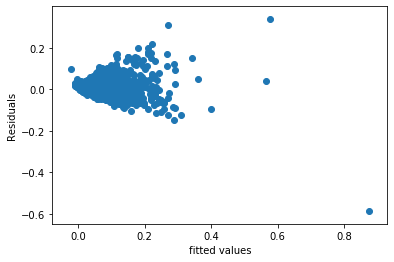

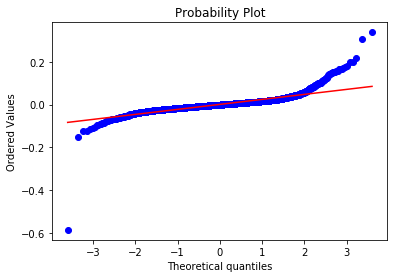

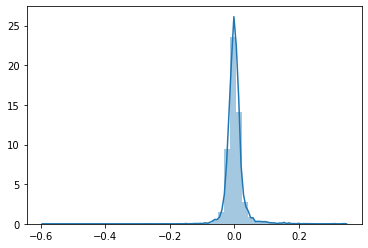

executing 5


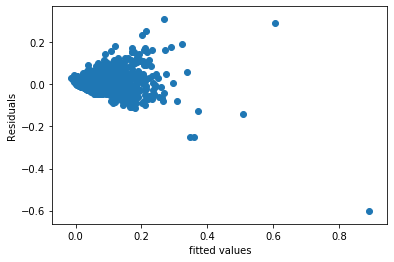

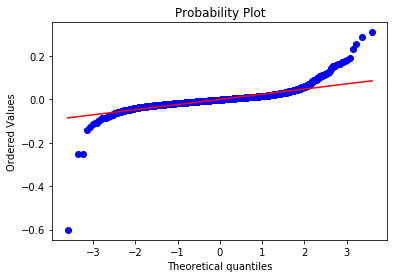

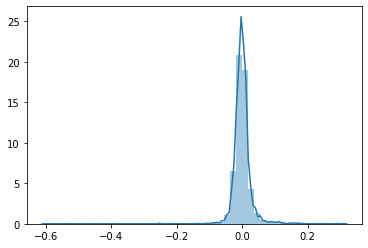

executing 6


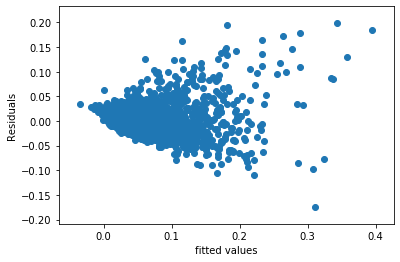

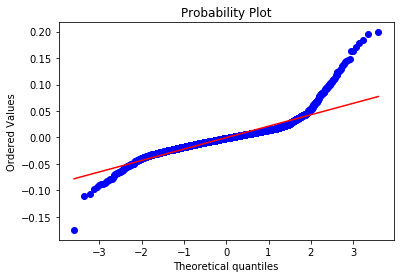

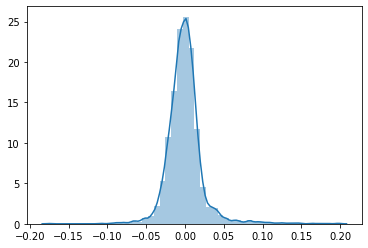

executing 7


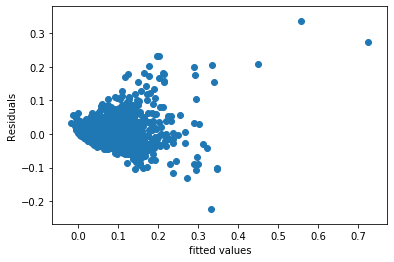

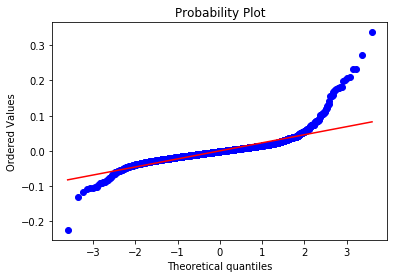

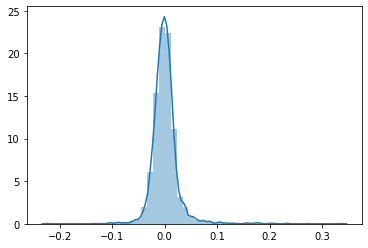

executing 8


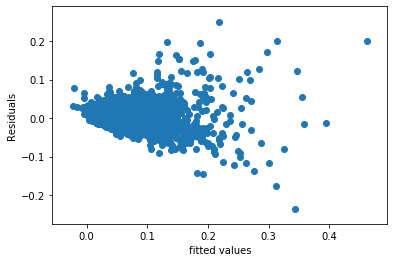

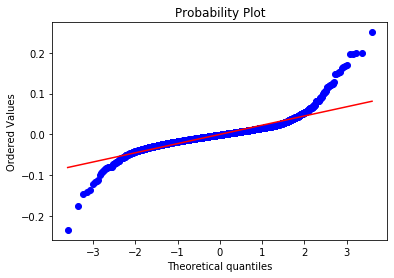

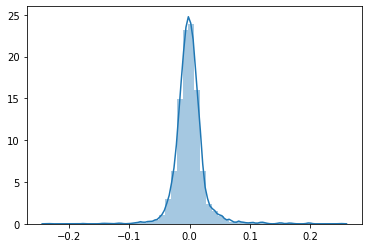

executing 9


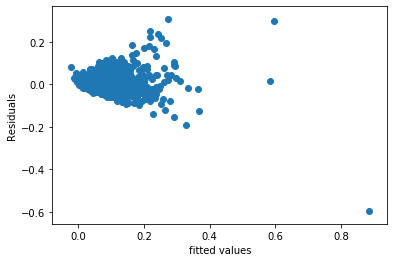

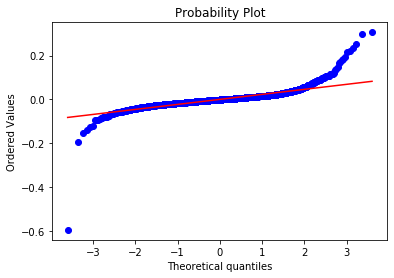

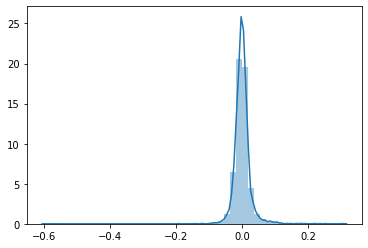

(0.0006468760057300455,
 0.0006167405050708406,
 0.7229374280067584,
 2.0097932422169973,
 1.3955146832640448e-05)

In [35]:
from sklearn.preprocessing import PolynomialFeatures

prederr=[]
predr2=[]
trainerr=[]
durb=[]
meanloss=[]
for i in range(10):
    
    print('executing',i)
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i*5)
    k1=xtrain
    polynomial_features= PolynomialFeatures(degree=1)
    #print(polynomial_features)
    xtrain = polynomial_features.fit_transform(xtrain)
    xtest=polynomial_features.fit_transform(xtest)
   
    model = LinearRegression()
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    ypre=model.predict(xtrain)
    
    trainerr.append(mean_squared_error(ytrain,ypre))
    prederr.append(mean_squared_error(ytest,ypred))
    predr2.append(r2_score(ytest,ypred))
    
    loss=ytest-ypred
    meanloss.append(np.mean(loss))
    #testing for linearity and homoscedasticity
    plt.scatter(ypred,loss)
    #plt.plot([0,1],[0,0])
    plt.xlabel('fitted values')
    plt.ylabel('Residuals')
    plt.show()
    #result=pass
    
    #testing normality of residual 
    probplot(loss.flatten(),fit=True,plot=plt)
    plt.show()
    sns.distplot(loss)
    plt.show()
    #result=pass
    
    #testing autocorrelation of residuals
    durb.append(durbin_watson(loss.flatten()))
    
meanerr=mean(prederr)
meanee=mean(trainerr)
meanr2=mean(predr2)

meanerr,meanee,meanr2,mean(durb),mean(meanloss)
    


In [ ]:
'''
linear=(0.005942628781337663, 0.0006167405050708406, -1.5543146258648484)
1=(0.0006468760057300455, 0.0006167405050708406, 0.7229374280067584)
2=(0.0009187082428036928, 0.00039213586080106243, 0.6112677982901052)
3=(83855795789601.47, 0.00019910883582418274, -3.4461835324958484e+16)

'''

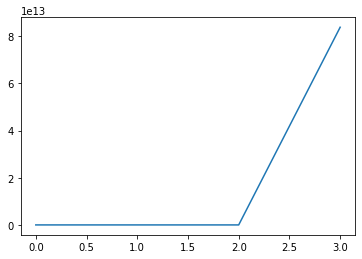

In [27]:
x=[0,1,2,3]
y=[0.005942628781337663,0.0006468760057300455,0.0009187082428036928,83855795789601.47]
plt.plot(x,y)

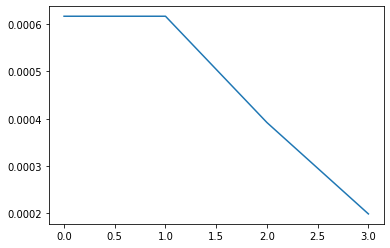

In [29]:
y=[0.0006167405050708406,0.0006167405050708406, 0.00039213586080106243,0.00019910883582418274]
plt.plot(x,y)

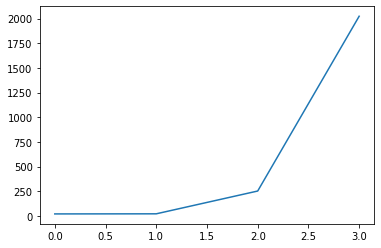

In [30]:
plt.plot(x,[21,22,253,2024])